#### Analysis of World Military Spending 

For my midterm project in my Data Minig class, I was provided with a dataset which had the Military spending across of all countries in the world from 1960. The data was in a very shabby format & neede a lot of cleaning & manipulation. 

In [2]:
#!pip install pandas
#!pip install numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import matplotlib.colors as clr

# read the tab called Current USD from military data, skip rows & delete columns with unnecessary data

mil_data=pd.read_excel(open('SIPRI-Milex-data-1949-2016.xlsx','rb'),
                       sheetname="Current USD",skiprows=5) 
mil_data1=mil_data[['Country',2012,2013,2014,2015,2016]]
mil_data1.head()

,Country,2012,2013,2014,2015,2016
0,Africa,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN
2,Algeria,9326.29,10161.6,9724.38,10412.7,10217.1
3,Libya,2987.41,3964.69,3755.66,. .,. .
4,Morocco,3402.7,4065.55,4048.61,3268.36,3327.03


In [3]:
# cleaning data by removing entries with invalid characters  

mil_data2=mil_data1[mil_data1!=". ."]
mil_data2=mil_data2[mil_data2!="xxx"]
mil_data2=mil_data2.dropna()
mil_data2.head()

,Country,2012,2013,2014,2015,2016
2,Algeria,9326.29,10161.6,9724.38,10412.7,10217.1
4,Morocco,3402.7,4065.55,4048.61,3268.36,3327.03
5,Tunisia,681.226,759.359,908.357,979.494,975.938
7,Angola,4144.63,6090.75,6841.86,3608.29,2824.26
8,Benin,78.2231,86.0032,92.9907,90.8961,98.1366


In [4]:
# taking a total of expenses so as to analyse data of top 10 countries only

for year in range(2012,2016+1):
    mil_data2[year]=pd.to_numeric(mil_data2[year], errors='ignore')
    
mil_data2['Total']=np.sum(mil_data2,axis=1)
mil_data2=np.round(mil_data2, decimals=2)

In [5]:
# sorting countries based on total expenditure 

mil_data2= mil_data2.set_index(['Country']).sort_values(by='Total',ascending=False)

In [6]:
# Top 10 Countries in Military Spending

top_ten=mil_data2.head(10)
top_ten

,2012,2013,2014,2015,2016,Total
Country,,,,,,
USA,684780.00,639704.00,609914.00,596009.64,611186.44,3141594.08
"China, P.R.",157390.38,179880.45,200772.20,214093.07,215175.93,967312.03
Russian Federation,81469.40,88352.90,84696.50,66418.71,69245.31,390182.82
Saudi Arabia,56497.87,67020.00,80762.40,87185.87,63672.80,355138.93
France,60035.15,62417.10,63613.57,55342.13,55745.48,297153.43
UK,58495.66,56861.76,59182.86,53862.19,48252.52,276654.98
India,47216.92,47403.53,50914.11,51295.48,55923.17,252753.21
Japan,60011.53,49023.93,46634.51,41103.23,46126.33,242899.53
Germany,46470.87,45930.54,46102.67,39812.58,41067.46,219384.13


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


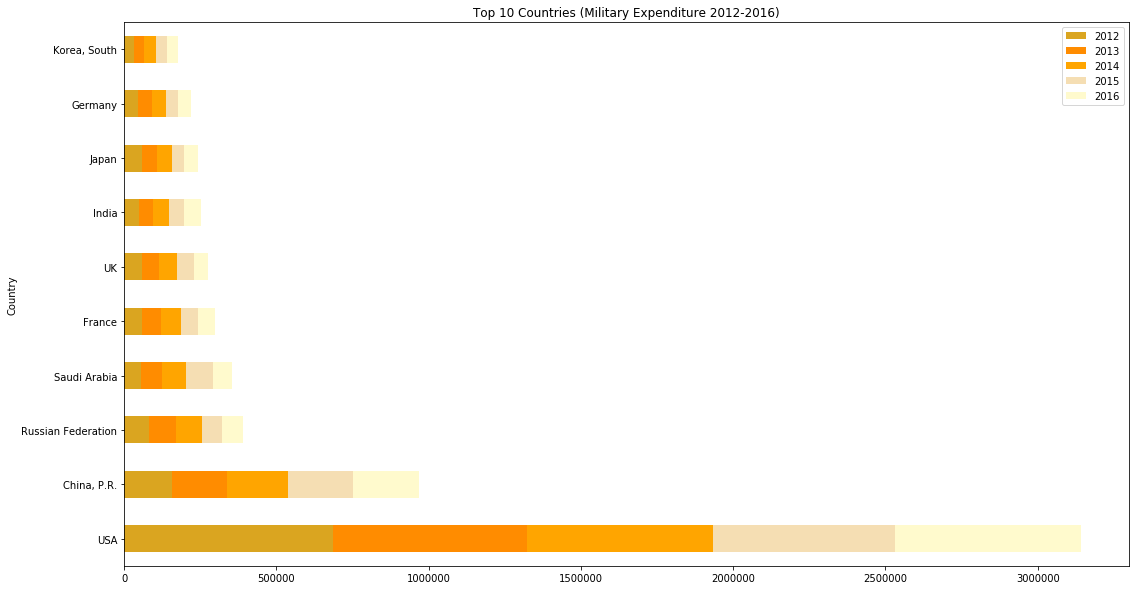

In [7]:
###################################################################################
# Top 10 Countries in Military Spending (Graphical Representation)
###################################################################################

colors=('goldenrod','darkorange','orange','wheat','lemonchiffon')

def plot_mil(df, limit=10):
    df = df.ix[:, [2012,2013,2014,2015,2016]][:limit]
    ax=df.plot(kind='barh', stacked=True, sort_columns=True,figsize=(18,10),
            title="Top 10 Countries (Military Expenditure 2012-2016)",color=colors)
    pp.ylabel=('Mil Exp in USD')
    pp.show()
    return
    
plot_mil(top_ten)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


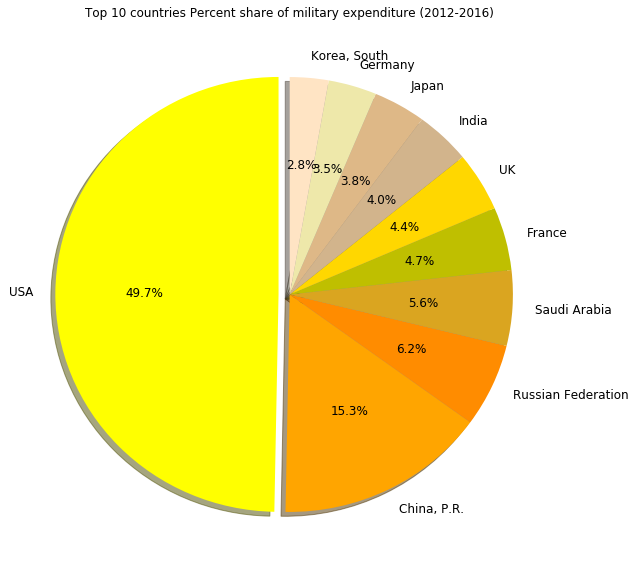

In [8]:
###############################################################################################
# Compare the data to the overall military spending of the top 10 countries using a a pie chart
###############################################################################################

top_ten_totals=np.sum(top_ten['Total'],axis=0)
top_ten['% share of military expenditure (top 10)']=np.round((top_ten['Total']/top_ten_totals)*100,1)

top_ten_totals=np.sum(top_ten['Total'],axis=0)
top_ten['% share of military expenditure (top 10)']=np.round((top_ten['Total']/top_ten_totals)*100,1)

explode=(.05,0,0,0,0,0,0,0,0,0)
colors=('yellow','orange','darkorange','goldenrod','y','gold','tan','burlywood','palegoldenrod','bisque')
title="Top 10 countries Percent share of military expenditure (2012-2016)"
top_ten.plot(kind='pie',y="% share of military expenditure (top 10)",
             legend=False,title=title,figsize=(10,10),fontsize=12,autopct='%.1f%%',
             explode=explode,colors=colors,shadow=True,startangle=90,label="")
pp.show()

Comparing the military spending to that country’s GDP

In [12]:
import zipfile

# importing, cleaning the country-wise GDP data 

zf=zipfile.ZipFile('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.zip')
gdp=pd.read_csv(zf.open('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv'),skiprows=4)
gdp1=gdp[['Country Name','2012','2013','2014','2015','2016']]

gdp1=gdp1.rename(columns={'Country Name':'Country'})
gdp1=gdp1.rename(columns={'2012':'g2012','2013':'g2013','2014':'g2014','2015':'g2015','2016':'g2016'})
gdp1=gdp1.replace({'United States':'USA','China':'China, P.R.','Korea, Rep.':'Korea, South',
                   'United Kingdom':'UK'})
gdp1=gdp1.dropna()
gdp1=np.round(gdp1, decimals=0)
gdp2=gdp1.set_index('Country')
gdp3=np.round(gdp2/1000000,1)
gdp3 = gdp3.reset_index()
gdp3.head(10)

,Country,g2012,g2013,g2014,g2015,g2016
0,Afghanistan,20536.5,20046.3,20050.2,19703.0,19469.0
1,Angola,115398.4,124912.1,126776.9,102962.2,89633.2
2,Albania,12319.8,12781.0,13219.9,11390.4,11926.9
3,Arab World,2740536.2,2838294.4,2904404.6,2561129.6,2500931.7
4,United Arab Emirates,374818.0,390427.3,403197.7,357949.2,348743.3
5,Argentina,545982.4,552025.1,526319.7,584711.5,545866.2
6,Armenia,10619.3,11121.5,11609.5,10529.2,10547.3
7,Antigua and Barbuda,1216.0,1195.9,1274.3,1355.6,1449.2
8,Australia,1538194.5,1567178.6,1459597.9,1345383.1,1204616.4
9,Austria,407451.6,428248.4,438376.2,376967.4,386427.8


In [13]:
top_ten=mil_data2.head(10)
top_ten = top_ten.reset_index()
top_ten

,Country,2012,2013,2014,2015,2016,Total
0,USA,684780.00,639704.00,609914.00,596009.64,611186.44,3141594.08
1,"China, P.R.",157390.38,179880.45,200772.20,214093.07,215175.93,967312.03
2,Russian Federation,81469.40,88352.90,84696.50,66418.71,69245.31,390182.82
3,Saudi Arabia,56497.87,67020.00,80762.40,87185.87,63672.80,355138.93
4,France,60035.15,62417.10,63613.57,55342.13,55745.48,297153.43
5,UK,58495.66,56861.76,59182.86,53862.19,48252.52,276654.98
6,India,47216.92,47403.53,50914.11,51295.48,55923.17,252753.21
7,Japan,60011.53,49023.93,46634.51,41103.23,46126.33,242899.53
8,Germany,46470.87,45930.54,46102.67,39812.58,41067.46,219384.13
9,"Korea, South",31951.76,34354.11,37286.22,36432.68,36776.73,176801.51


In [14]:
# inner merge the GDP data and Top 10 countries that spend on Military data. 

mil_gdp_top_ten = gdp3.merge(top_ten, left_on = 'Country', right_on = 'Country')
mil_gdp_top_ten

,Country,g2012,g2013,g2014,g2015,g2016,2012,2013,2014,2015,2016,Total
0,"China, P.R.",8560546.9,9607224.2,10482371.3,11064664.8,11199145.2,157390.38,179880.45,200772.20,214093.07,215175.93,967312.03
1,Germany,3543983.9,3752513.5,3879276.6,3363599.9,3466756.9,46470.87,45930.54,46102.67,39812.58,41067.46,219384.13
2,France,2681416.1,2808511.2,2849305.3,2433562.0,2465454.0,60035.15,62417.10,63613.57,55342.13,55745.48,297153.43
3,UK,2646002.6,2719509.5,2998833.6,2861090.7,2618885.7,58495.66,56861.76,59182.86,53862.19,48252.52,276654.98
4,India,1827637.9,1856722.1,2035393.5,2111751.1,2263522.5,47216.92,47403.53,50914.11,51295.48,55923.17,252753.21
5,Japan,6203213.1,5155717.1,4848733.4,4383076.3,4939383.9,60011.53,49023.93,46634.51,41103.23,46126.33,242899.53
6,"Korea, South",1222807.3,1305605.0,1411333.9,1382764.0,1411245.6,31951.76,34354.11,37286.22,36432.68,36776.73,176801.51
7,Russian Federation,2170143.6,2230625.0,2063662.3,1365865.2,1283162.3,81469.40,88352.90,84696.50,66418.71,69245.31,390182.82
8,Saudi Arabia,735974.8,746647.1,756350.3,654269.9,646438.4,56497.87,67020.00,80762.40,87185.87,63672.80,355138.93
9,USA,16155255.0,16691517.0,17393103.0,18036648.0,18569100.0,684780.00,639704.00,609914.00,596009.64,611186.44,3141594.08


In [15]:
# creating a ratio of military expenditure and gdp

mil_gdp_top_ten['r2012']=np.round((mil_gdp_top_ten[2012])/(mil_gdp_top_ten['g2012'])*100,1)
mil_gdp_top_ten['r2013']=np.round((mil_gdp_top_ten[2013])/(mil_gdp_top_ten['g2013'])*100,1)
mil_gdp_top_ten['r2014']=np.round((mil_gdp_top_ten[2014])/(mil_gdp_top_ten['g2014'])*100,1)
mil_gdp_top_ten['r2015']=np.round((mil_gdp_top_ten[2015])/(mil_gdp_top_ten['g2015'])*100,1)
mil_gdp_top_ten['r2016']=np.round((mil_gdp_top_ten[2016])/(mil_gdp_top_ten['g2016'])*100,1)

In [16]:
# keeping required columns only 

mil_gdp_top_ten.drop(mil_gdp_top_ten.columns[[(1,2,3,4,5,6,7,8,9,10,11)]],axis=1,inplace=True)
mil_gdp_top_ten

,Country,r2012,r2013,r2014,r2015,r2016
0,"China, P.R.",1.8,1.9,1.9,1.9,1.9
1,Germany,1.3,1.2,1.2,1.2,1.2
2,France,2.2,2.2,2.2,2.3,2.3
3,UK,2.2,2.1,2.0,1.9,1.8
4,India,2.6,2.6,2.5,2.4,2.5
5,Japan,1.0,1.0,1.0,0.9,0.9
6,"Korea, South",2.6,2.6,2.6,2.6,2.6
7,Russian Federation,3.8,4.0,4.1,4.9,5.4
8,Saudi Arabia,7.7,9.0,10.7,13.3,9.8
9,USA,4.2,3.8,3.5,3.3,3.3


In [17]:
# renaming columns

mil_gdp_ratio=mil_gdp_top_ten.rename(columns={'r2012':2012,'r2013':2013,'r2014':2014,'r2015':2015,
                                              'r2016':2016})
mil_gdp_ratio.set_index('Country')

,2012,2013,2014,2015,2016
Country,,,,,
"China, P.R.",1.8,1.9,1.9,1.9,1.9
Germany,1.3,1.2,1.2,1.2,1.2
France,2.2,2.2,2.2,2.3,2.3
UK,2.2,2.1,2.0,1.9,1.8
India,2.6,2.6,2.5,2.4,2.5
Japan,1.0,1.0,1.0,0.9,0.9
"Korea, South",2.6,2.6,2.6,2.6,2.6
Russian Federation,3.8,4.0,4.1,4.9,5.4
Saudi Arabia,7.7,9.0,10.7,13.3,9.8


In [18]:
for year in range(2012,2016+1):
    mil_gdp_ratio[[year]]=mil_gdp_ratio[[year]].astype(float)

In [19]:
mil_gdp_ratio.set_index('Country',inplace=True)
mil_gdp_ratio

,2012,2013,2014,2015,2016
Country,,,,,
"China, P.R.",1.8,1.9,1.9,1.9,1.9
Germany,1.3,1.2,1.2,1.2,1.2
France,2.2,2.2,2.2,2.3,2.3
UK,2.2,2.1,2.0,1.9,1.8
India,2.6,2.6,2.5,2.4,2.5
Japan,1.0,1.0,1.0,0.9,0.9
"Korea, South",2.6,2.6,2.6,2.6,2.6
Russian Federation,3.8,4.0,4.1,4.9,5.4
Saudi Arabia,7.7,9.0,10.7,13.3,9.8


                    2012  2013  2014  2015  2016
Country                                         
China, P.R.          1.8   1.9   1.9   1.9   1.9
Germany              1.3   1.2   1.2   1.2   1.2
France               2.2   2.2   2.2   2.3   2.3
UK                   2.2   2.1   2.0   1.9   1.8
India                2.6   2.6   2.5   2.4   2.5
Japan                1.0   1.0   1.0   0.9   0.9
Korea, South         2.6   2.6   2.6   2.6   2.6
Russian Federation   3.8   4.0   4.1   4.9   5.4
Saudi Arabia         7.7   9.0  10.7  13.3   9.8
USA                  4.2   3.8   3.5   3.3   3.3


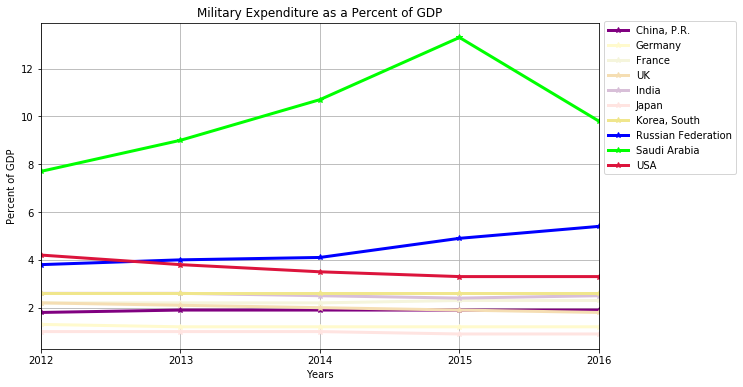

In [20]:
# bar chart comparing military expenditure as a percent of GDP

colors=('purple','lemonchiffon','beige','wheat','thistle','mistyrose','khaki','blue','lime','crimson')

plot1=mil_gdp_ratio.T.plot(kind='line',figsize=(10,6),xlim=(2012,2016),xticks=(2012,2013,2014,2015,2016),
                           legend=True,lw=3,marker='*',fontsize=10,
                           title="Military Expenditure as a Percent of GDP",grid=True,color=colors) 
plot1.set_xlabel("Years")
plot1.set_ylabel("Percent of GDP")
plot1.legend(loc='center left', bbox_to_anchor=(1,.77))
print(mil_gdp_ratio)

pp.show()

Comparing the per person military spending of a country to the per person GDP of that same country

In [21]:
# importing per capita GDP data

import zipfile

zf2=zipfile.ZipFile('API_NY.GDP.PCAP.CD_DS2_en_csv_v2.zip')

pgdp=pd.read_csv(zf2.open('API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv'),skiprows=4)
pgdp=pgdp[['Country Name','2012','2013','2014','2015','2016']]
pgdp=pgdp.rename(columns={'Country Name':'Country'})
pgdp=pgdp.replace({'United States':'USA','China':'China, P.R.','United Kingdom':'UK',
                   'Korea, Rep.':'Korea, South'})
pgdp=pgdp.dropna()
pgdp=np.round(pgdp, decimals=1)
pgdp=pgdp.set_index('Country')

pgdp1=pgdp.loc[['China, P.R.','UK','Germany','France','USA','India','Russian Federation','Japan',
                'Saudi Arabia','Korea, South']]
pgdp1

,2012,2013,2014,2015,2016
Country,,,,,
"China, P.R.",6337.9,7077.8,7683.5,8069.2,8123.2
UK,41538.3,42407.4,46412.1,43929.7,39899.4
Germany,44065.2,46530.9,47902.7,41176.9,41936.1
France,40838.0,42554.1,42955.2,36526.8,36855.0
USA,51450.1,52787.0,54598.6,56207.0,57466.8
India,1447.0,1452.2,1573.1,1613.2,1709.4
Russian Federation,15154.5,15543.7,14125.9,9329.3,8748.4
Japan,48603.5,40454.4,38096.2,34474.1,38894.5
Saudi Arabia,25303.1,24934.4,24575.4,20732.9,20028.6


In [22]:
# importing per capita military expenditure data

mil_data_pp=pd.read_excel(open('SIPRI-Milex-data-1949-2016.xlsx','rb'),
                          sheetname="Per capita",skiprows=6)
mil_data_pp=mil_data_pp[['Country',2012,2013,2014,2015,2016]]

# deleting data with NAs, and other irregular values

mil_data_pp=mil_data_pp[mil_data_pp!=". ."]
mil_data_pp=mil_data_pp[mil_data_pp!="xxx"]
mil_data_pp=mil_data_pp.dropna()
mil_data_pp=mil_data_pp.replace({'USSR/Russia':'Russian Federation'})
mil_data_pp.set_index('Country',inplace=True)
mil_data_pp1=mil_data_pp.loc[['China, P.R.','UK','Germany','France','USA','India','Russian Federation',
                              'Japan','Saudi Arabia','Korea, South']]
mil_data_pp1=np.round(mil_data_pp1,1)
mil_data_pp1

,2012,2013,2014,2015,2016
Country,,,,,
"China, P.R.",116.1,132.0,146.6,155.6,155.7
UK,920.1,889.1,920.0,832.3,741.3
Germany,577.4,570.1,571.7,493.4,509.3
France,944.5,977.6,992.1,859.4,862.4
USA,2175.3,2017.1,1909.3,1852.3,1886.2
India,37.4,37.0,39.3,39.1,42.1
Russian Federation,568.6,616.3,590.5,463.0,483.1
Japan,472.0,386.1,367.8,324.7,365.4
Saudi Arabia,1915.4,2219.1,2614.8,2764.3,1978.2


In [23]:
# merging files to get a per capita military expenditure v/s per capita gdp dataframe 

pc_mil_v_gdp=mil_data_pp1.join(pgdp1)
pc_mil_v_gdp.reset_index(inplace=True)
pc_mil_v_gdp

,Country,2012,2013,2014,2015,2016,2012,2013,2014,2015,2016
0,"China, P.R.",116.1,132.0,146.6,155.6,155.7,6337.9,7077.8,7683.5,8069.2,8123.2
1,UK,920.1,889.1,920.0,832.3,741.3,41538.3,42407.4,46412.1,43929.7,39899.4
2,Germany,577.4,570.1,571.7,493.4,509.3,44065.2,46530.9,47902.7,41176.9,41936.1
3,France,944.5,977.6,992.1,859.4,862.4,40838.0,42554.1,42955.2,36526.8,36855.0
4,USA,2175.3,2017.1,1909.3,1852.3,1886.2,51450.1,52787.0,54598.6,56207.0,57466.8
5,India,37.4,37.0,39.3,39.1,42.1,1447.0,1452.2,1573.1,1613.2,1709.4
6,Russian Federation,568.6,616.3,590.5,463.0,483.1,15154.5,15543.7,14125.9,9329.3,8748.4
7,Japan,472.0,386.1,367.8,324.7,365.4,48603.5,40454.4,38096.2,34474.1,38894.5
8,Saudi Arabia,1915.4,2219.1,2614.8,2764.3,1978.2,25303.1,24934.4,24575.4,20732.9,20028.6
9,"Korea, South",644.1,689.2,744.6,724.4,728.8,24358.8,25890.0,27811.4,27105.1,27538.8


In [24]:
# function to compare per capita GDP and per capita military expenditure 

new0=pd.DataFrame()

def capita_mil_v_gdp(enter_year):
    ppmdp_col_loc=pc_mil_v_gdp.columns.get_loc(enter_year)
    ppgdp_col_loc=ppmdp_col_loc+5
    new0=pc_mil_v_gdp.iloc[:,np.r_[0,ppmdp_col_loc,ppgdp_col_loc]]
    new0=new0.set_index('Country')
    new0.columns.values[0]='per capita military spending'
    new0.columns.values[1]='per capita GDP'
    print(new0)
    
    plot5=pp.figure()
    xaxis=new0['per capita GDP'].plot(kind='bar',figsize=(10,5),color='gold',align='center')
    xlim=pp.xlim(xmin=-.5)
    xaxis2=xaxis.twinx()
    xaxis.set_ylabel("per capita GDP")
    xaxis2.set_ylabel("per capita military spending")
    plot5=new0['per capita military spending'].plot(kind='line',
                                                    marker='x',linewidth=1,color='black',
                                                    xlim=xlim,title=("per capita GDP v per capita military expenditure " + str(enter_year))) 
    pp.show()
    return

                    per capita military spending  per capita GDP
Country                                                         
China, P.R.                                155.7          8123.2
UK                                         741.3         39899.4
Germany                                    509.3         41936.1
France                                     862.4         36855.0
USA                                       1886.2         57466.8
India                                       42.1          1709.4
Russian Federation                         483.1          8748.4
Japan                                      365.4         38894.5
Saudi Arabia                              1978.2         20028.6
Korea, South                               728.8         27538.8


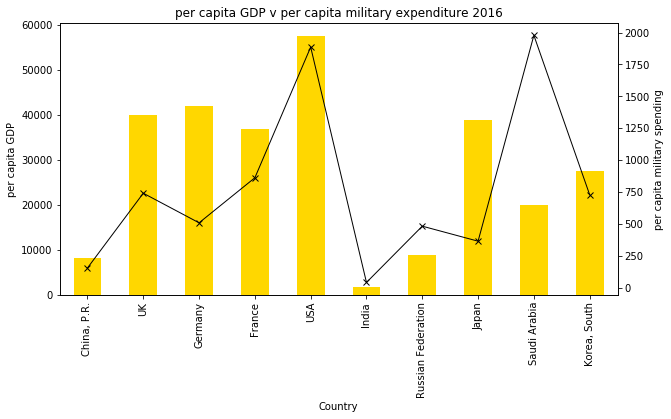

In [25]:
capita_mil_v_gdp(2016)

Single out the fastest growing countries in military spending in fixed value and in percentage between any 2 years

In [26]:
mil_data3=mil_data2
mil_data3.reset_index(inplace=True)

def two_year_comparison_fastest(start_year,end_year):
    for i in range(start_year,end_year):
        new1=mil_data2[['Country',start_year,end_year]].copy()
        new1['difference']=np.subtract(new1[end_year],new1[start_year])
        new1=new1.sort_values('difference',ascending=False)
        new1['Change percent']=np.round(np.subtract(new1[end_year],new1[start_year])/new1[start_year]*100,1)
        new2=new1.head(10)
        new2=new2.set_index('Country')
        print(new2)
        
        plot4=pp.figure()
        xaxis=new2['difference'].plot(kind='bar',figsize=(10,5),color='gold',align='center')
        xlim=pp.xlim(xmin=-.5)
        xaxis2=xaxis.twinx()
        xaxis2.set_ylabel("Percent Change")
        xaxis.set_ylabel("Change in military expenditure (in mil USD)")
        plot4=new2['Change percent'].plot(kind='line',marker='x',linewidth=1,color='black'
                                                ,xlim=xlim
                                                ,title=("Countries with highest positive change in military expenditure between "  + str(start_year)+ " & " +str(end_year))
        )
        pp.show()

        return

                         2015       2016  difference  Change percent
Country                                                             
USA                 596009.64  611186.44    15176.80             2.5
Japan                41103.23   46126.33     5023.10            12.2
India                51295.48   55923.17     4627.69             9.0
Venezuela             5264.79    9222.05     3957.26            75.2
Russian Federation   66418.71   69245.31     2826.60             4.3
Italy                25294.63   27933.79     2639.16            10.4
Iran                 10588.77   12685.01     2096.24            19.8
Germany              39812.58   41067.46     1254.88             3.2
Israel               16763.53   17976.99     1213.46             7.2
China, P.R.         214093.07  215175.93     1082.86             0.5


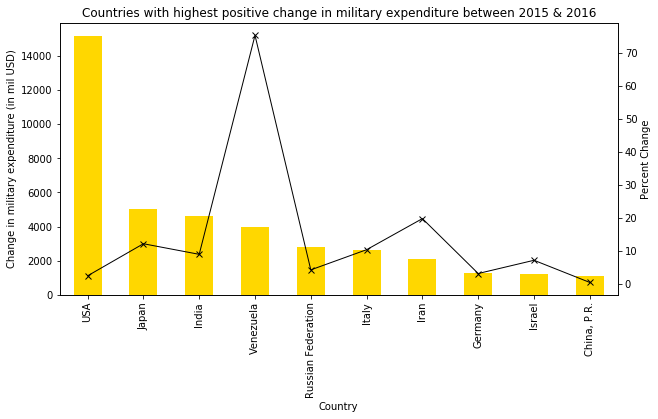

In [27]:
two_year_comparison_fastest(2015,2016)

Single out the fastest regressing countries in terms of military spending in fixed value and in percentage between any 2 years

In [28]:
mil_data4=mil_data2

def two_year_comparison_regressed(start_year,end_year):
    for i in range(start_year,end_year):
        new1=mil_data4[['Country',start_year,end_year]].copy()
        new1['difference']=np.subtract(new1[end_year],new1[start_year])
        new1=new1.sort_values('difference')
        new1['Change percent']=np.round(np.subtract(new1[end_year],new1[start_year])/new1[start_year]*100,1)
        new2=new1.head(10)
        new2=new2.set_index('Country')
        print(new2)
        
        plot4=pp.figure()
        xaxis=new2['difference'].plot(kind='bar',figsize=(10,5),color='firebrick',align='center')
        xlim=pp.xlim(xmin=-.5)
        xaxis2=xaxis.twinx()
        xaxis2.set_ylabel("Percent Change")
        xaxis.set_ylabel("Change in military expenditure (in mil USD)")
        plot4=new2['Change percent'].plot(kind='line',marker='x',linewidth=1,color='purple'
                                                ,xlim=xlim
                                                ,title=("Countries with highest negative change in military expenditure between "  + str(start_year)+ " & " +str(end_year))
        )
        pp.show()

        return

                         2014       2015  difference  Change percent
Country                                                             
Russian Federation   84696.50   66418.71   -18277.79           -21.6
USA                 609914.00  596009.64   -13904.36            -2.3
France               63613.57   55342.13    -8271.44           -13.0
Brazil               32659.61   24617.70    -8041.91           -24.6
Germany              46102.67   39812.58    -6290.09           -13.6
Italy                31572.44   25294.63    -6277.81           -19.9
Japan                46634.51   41103.23    -5531.28           -11.9
UK                   59182.86   53862.19    -5320.67            -9.0
Angola                6841.86    3608.29    -3233.57           -47.3
Colombia             11845.96    9127.17    -2718.79           -23.0


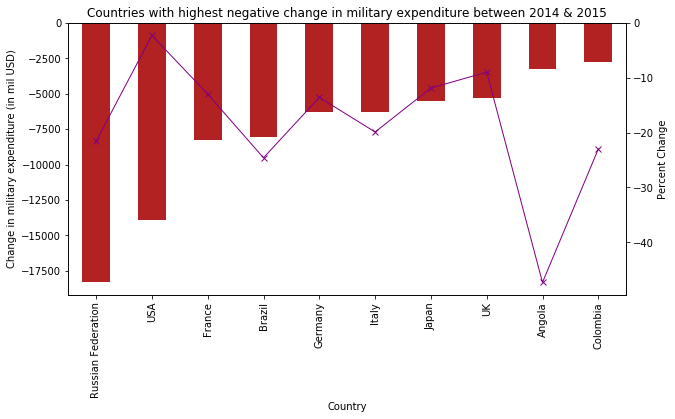

In [29]:
two_year_comparison_regressed(2014,2015)

US Expenditure on Military from 2000 to 2016

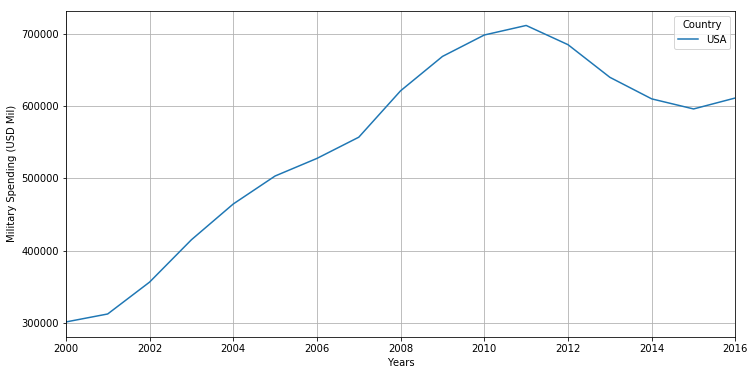

In [30]:
mil_data6=mil_data[['Country',2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,
                    2015,2016]]
mil_data6=mil_data6.loc[mil_data6['Country']=='USA']
mil_data6=mil_data6.set_index('Country')

usa_spending=mil_data6.T.plot(legend=True,grid=True,figsize=(12,6))

usa_spending.set_xlabel("Years")
usa_spending.set_ylabel("Military Spending (USD Mil)")

pp.show()